In [34]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")
from train_utils import compute_metrics

In [71]:
# compute dcdi oracle scores

def shd(B_true, B_pred_dcdi, threshold):
    B_pred_thresh = (B_pred_dcdi > threshold).astype(int)
    B_true = B_true.astype(int)

    diff = B_true != B_pred_thresh
    score = diff.sum()
    shd = score - ((((diff + diff.transpose()) == 0) & (diff != 0)).sum() / 2)
    return shd


d20_oracle_records = []
d20_oracle_thresholds = []
for seed in [0, 1, 2]:
    B_pred_dcdi = np.load(f"../saved_mtxs/B_pred_50_20_{seed}_1.0_dcdi.npy")
    B_true = np.load(f"../saved_mtxs/B_pred_50_20_{seed}_1.0_gt.npy")

    f = lambda t: shd(B_true, B_pred_dcdi, t)
    bounds = (0, np.max(B_pred_dcdi))
    res = optimize.differential_evolution(f, bounds=[bounds])
    print(f"seed={seed}: shd={res.fun:.3f}, x={res.x[0]}")
    metrics_dict = compute_metrics(B_true, (B_pred_dcdi > res.x[0]).astype(int))
    d20_oracle_records.append(
        ("DCDI-Oracle", metrics_dict["shd"], metrics_dict["recall"], metrics_dict["precision"], metrics_dict["n_edges_pred"], 0)
    )
    d20_oracle_thresholds.append(res.x[0])
j

seed=0: shd=78.000, x=0.15531096569821617
seed=1: shd=74.000, x=0.08773472206066091
seed=2: shd=68.000, x=0.06477796145332249


In [72]:
d20_oracle_records

[('DCDI-Oracle', 78.0, 0.8235294117647058, 0.28, 100.0, 0),
 ('DCDI-Oracle', 74.0, 0.8823529411764706, 0.3, 100.0, 0),
 ('DCDI-Oracle', 68.0, 0.7580645161290323, 0.47, 100.0, 0)]

In [77]:
# d=20 results
d20_records = [
    (20, "SDCDI", 42, .93, .7266, 128, 40),
    (20, "SDCDI", 56, .97, .6467, 150, 40),
    (20, "SDCDI", 50, .94, .6812, 138, 40),
    (20, "DCDI", 83, 0.2, 0.8696, 23, 1906), 
    (20, "DCDI", 86, 0.14, 1, 14, 1960),
    (20, "DCDI", 81, 0.23, 0.8518, 27, 1935),
    (20, "DCDI-Oracle", 78,  0.8235, 0.28, 100, 1906), 
    (20, "DCDI-Oracle", 74, 0.8824, 0.3, 100, 1960),
    (20, "DCDI-Oracle", 68, 0.7581, 0.47, 100, 1935),
    (20, "DCDFG", 152, .47, .3219, 146, 848),
    (20, "DCDFG", 114, .45, .4327, 104, 875),
    (20, "DCDFG", 145, .45, .3333, 135, 900),
]
d20_df = pd.DataFrame.from_records(d20_records, columns=["d", "method", "shd", "recall", "precision", "n_edges_pred", "runtime"])
d20_df

,d,method,shd,recall,precision,n_edges_pred,runtime
0,20,SDCDI,42,0.9300,0.7266,128,40
1,20,SDCDI,56,0.9700,0.6467,150,40
2,20,SDCDI,50,0.9400,0.6812,138,40
3,20,DCDI,83,0.2000,0.8696,23,1906
4,20,DCDI,86,0.1400,1.0000,14,1960
5,20,DCDI,81,0.2300,0.8518,27,1935
6,20,DCDI-Oracle,78,0.8235,0.2800,100,1906
7,20,DCDI-Oracle,74,0.8824,0.3000,100,1960
8,20,DCDI-Oracle,68,0.7581,0.4700,100,1935
9,20,DCDFG,152,0.4700,0.3219,146,848


/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='shd'>

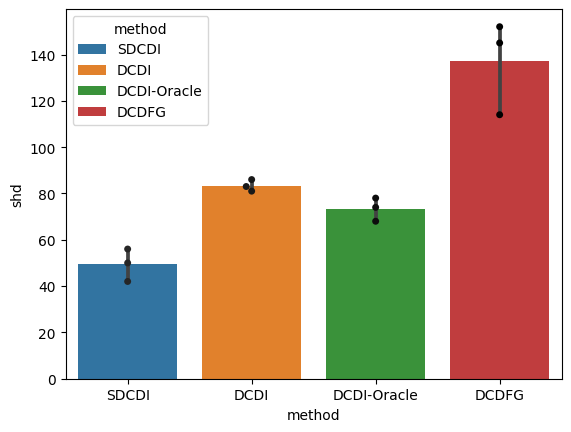

In [78]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="shd", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="shd", hue="method", legend=False, color="black", dodge=False, ax=ax)


/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='recall'>

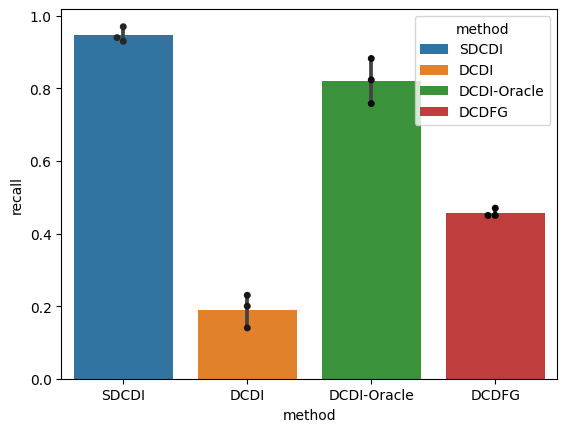

In [79]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="recall", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="recall", hue="method", legend=False, color="black", dodge=False, ax=ax)

/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='precision'>

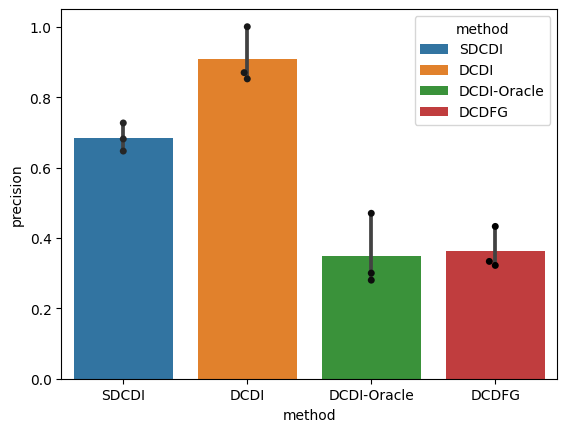

In [80]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="precision", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="precision", hue="method", legend=False, color="black", dodge=False, ax=ax)

/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='n_edges_pred'>

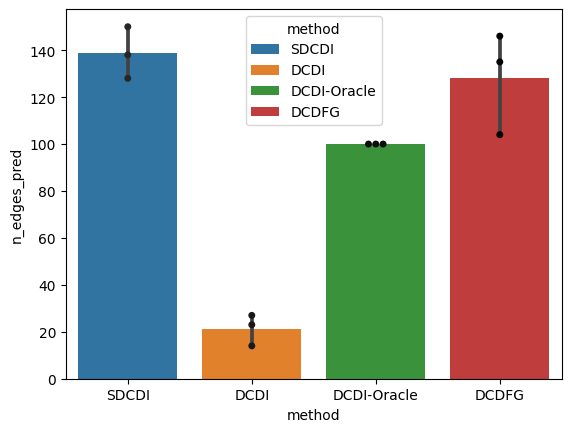

In [81]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="n_edges_pred", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="n_edges_pred", hue="method", legend=False, color="black", dodge=False, ax=ax)

/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


TypeError: set_ticklabels() missing 1 required positional argument: 'labels'

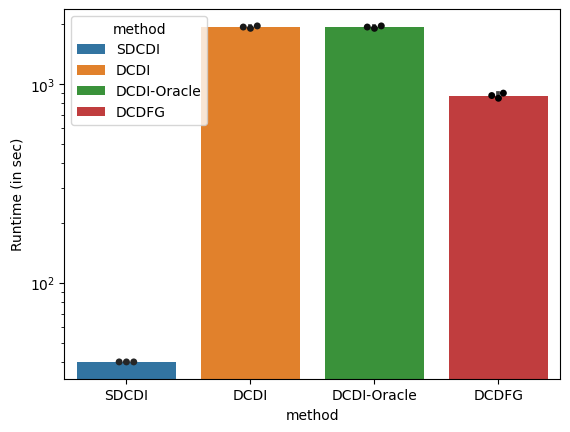

In [82]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="runtime", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="runtime", hue="method", legend=False, color="black", dodge=False, ax=ax)
ax.set_ylabel("Runtime (in sec)")
ax.set_yscale("log")
ax.set_yticklabels()

In [83]:
# d=50
d50_records = [
    (50, "SDCDI", 158, .852, .6377, 334, 123),
    (50, "SDCDI", 136, .928, .6629, 350, 116),
    (50, "SDCDI", 161, .936, .6174, 379, 112),
    (50, "DCDFG", 852, .48, .1425, 842, 1097),
    (50, "DCDFG", 879, .372, .1141, 815, 1017),
    (50, "DCDFG", 896, .388, .1155, 840, 942),
]
d50_df = pd.DataFrame.from_records(d50_records, columns=["d", "method", "shd", "recall", "precision", "n_edges_pred", "runtime"])
print(d50_df.head())

# d=100
d100_records = [
    (100, "SDCDI", 132, .944, .8194, 576, 319),
    (100, "SDCDI", 156, .938, .7896, 594, 320),
    (100, "SDCDI", 151, .906, .8133, 557, 318),
    (100, "DCDFG", 778, .154, .1782, 432, 1261),
    (100, "DCDFG", 1278, .244, .1194, 1022, 1663),
    (100, "DCDFG", 1619, .33, .1139, 1449, 2265),
]
d100_df = pd.DataFrame.from_records(d100_records, columns=["d", "method", "shd", "recall", "precision", "n_edges_pred", "runtime"])
print(d100_df.head())

    d method  shd  recall  precision  n_edges_pred  runtime
0  50  SDCDI  158   0.852     0.6377           334      123
1  50  SDCDI  136   0.928     0.6629           350      116
2  50  SDCDI  161   0.936     0.6174           379      112
3  50  DCDFG  852   0.480     0.1425           842     1097
4  50  DCDFG  879   0.372     0.1141           815     1017
     d method   shd  recall  precision  n_edges_pred  runtime
0  100  SDCDI   132   0.944     0.8194           576      319
1  100  SDCDI   156   0.938     0.7896           594      320
2  100  SDCDI   151   0.906     0.8133           557      318
3  100  DCDFG   778   0.154     0.1782           432     1261
4  100  DCDFG  1278   0.244     0.1194          1022     1663


In [23]:
d200_sdcdi_runtime = 1079

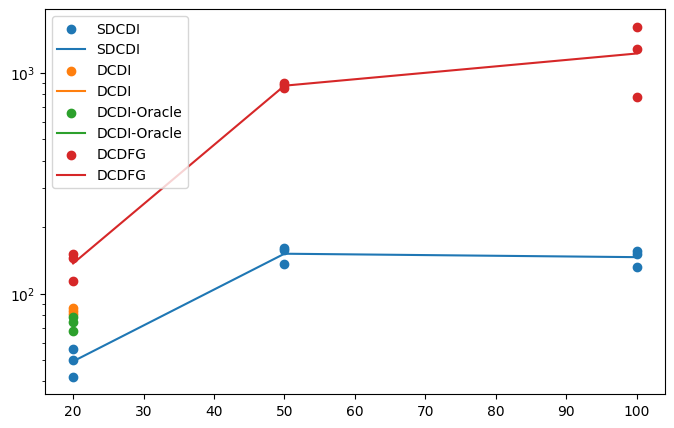

In [113]:
# Grouped SHD line swarm plot
full_df = pd.concat([d20_df, d50_df, d100_df])

fig, ax = plt.subplots(figsize=(8, 5))
for method in ["SDCDI", "DCDI", "DCDI-Oracle", "DCDFG"]:
    ax.scatter(full_df[full_df["method"] == method]["d"], full_df[full_df["method"] == method]["shd"], marker="o", label=method)
    method_df = full_df[full_df["method"] == method]
    ds = []
    shd_means = []
    for d in method_df["d"].unique():
        ds.append(d)
        shd_means.append(method_df[method_df["d"] == d]["shd"].mean())
    ax.plot(ds, shd_means, label=method)
plt.yscale("log")
plt.legend()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("figs/shd_comparison.svg", bbox_inches="tight")

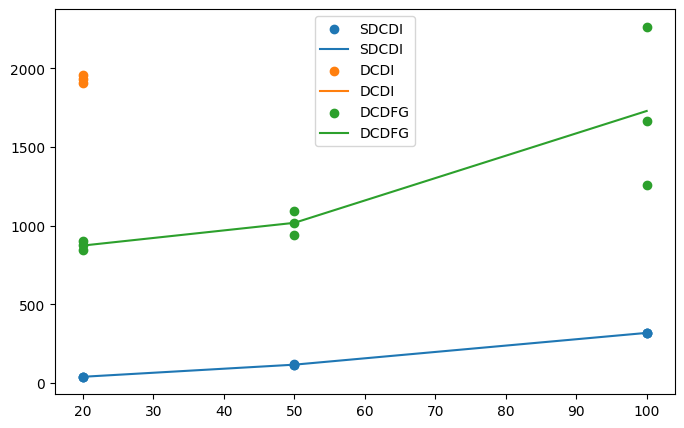

In [114]:
# Grouped runtime line swarm plot
full_df = pd.concat([d20_df, d50_df, d100_df])

fig, ax = plt.subplots(figsize=(8, 5))
for method in ["SDCDI", "DCDI", "DCDFG"]:
    ax.scatter(full_df[full_df["method"] == method]["d"], full_df[full_df["method"] == method]["runtime"], marker="o", label=method)
    method_df = full_df[full_df["method"] == method]
    ds = []
    shd_means = []
    for d in method_df["d"].unique():
        ds.append(d)
        shd_means.append(method_df[method_df["d"] == d]["runtime"].mean())
    ax.plot(ds, shd_means, label=method)
# plt.yscale("log")
plt.legend()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("figs/runtime_comparison.svg", bbox_inches="tight")

In [55]:
# d=10 plots to annotate w  
d10_B_true = np.load(f"../saved_mtxs/d10_B_true.npy")
d10_B_pred = np.load(f"../saved_mtxs/d10_B_pred.npy")
d10_mask = np.load(f"../saved_mtxs/d10_mask.npy")
d10_premask = np.load(f"../saved_mtxs/d10_premask.npy")
d10_B_pred_thresh = (d10_B_pred > 0.3).astype(int)

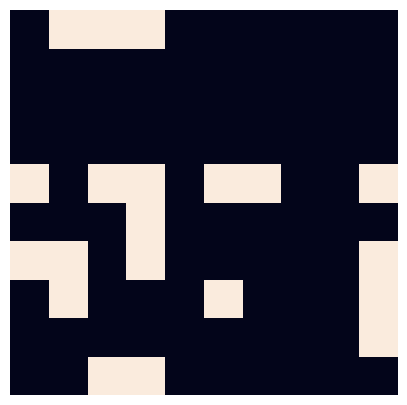

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(d10_B_true, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
plt.savefig("figs/d10_B_true.svg", bbox_inches="tight")

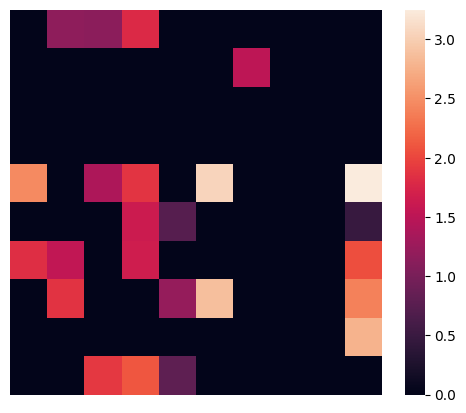

In [57]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(d10_B_pred, xticklabels=False, yticklabels=False, ax=ax)
plt.savefig("figs/d10_B_pred.svg", bbox_inches="tight")

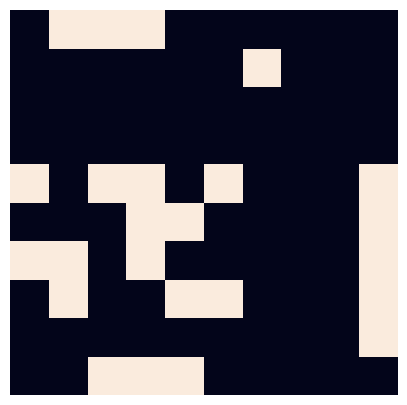

In [58]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(d10_B_pred_thresh, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
plt.savefig("figs/d10_B_pred_thresh.svg", bbox_inches="tight")

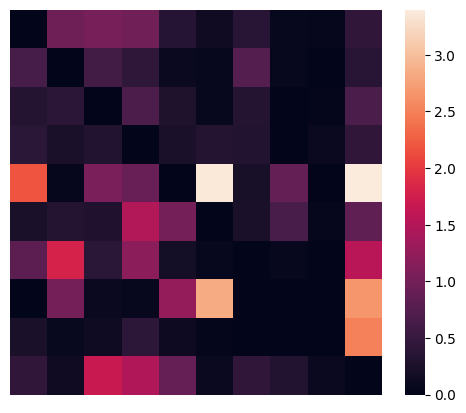

In [59]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(d10_premask, xticklabels=False, yticklabels=False, cbar=True, ax=ax)
plt.savefig("figs/d10_premask.svg", bbox_inches="tight")

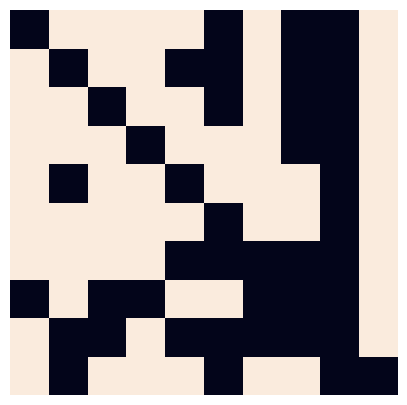

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(d10_mask, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
plt.savefig("figs/d10_mask.svg", bbox_inches="tight")

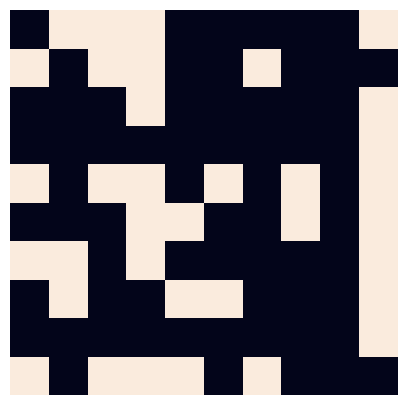

In [76]:
# sparser mask
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap((d10_premask > 0.4).astype(int), xticklabels=False, yticklabels=False, cbar=False, ax=ax)
plt.savefig("figs/d10_mask.svg", bbox_inches="tight")

In [116]:
# d=50 sparsity experiment
d50_sparsity_exp_records = (
    (100,"SCD", 230, 138, .96, .417),
    (250, "SCD", 334, 158, .852, .638),
    (500, "SCD", 499, 207, .792, .794),
    (1000, "SCD", 745, 417, .664, .891),
    (100,"DCDFG", 826, 800, .63, .076 ),
    (250, "DCDFG", 834, 898, .372, .1115),
    (500, "DCDFG", 711, 807, .404, .2841),
    (1000, "DCDFG", 980, 1094, .443, .452),
)
d50_sparsity_exp_df = pd.DataFrame.from_records(d50_sparsity_exp_records, columns=["n_true_edges", "method", "n_edges_pred", "shd", "recall", "precision"])

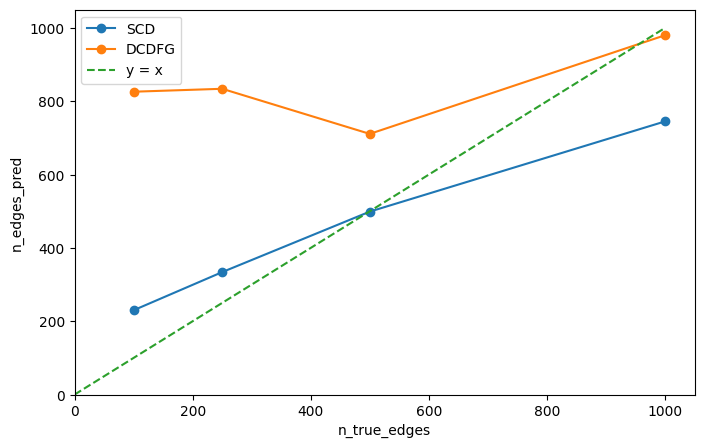

In [127]:
fig, ax = plt.subplots(figsize=(8, 5))
for method in ["SCD", "DCDFG"]:
    ax.plot(d50_sparsity_exp_df[d50_sparsity_exp_df["method"] == method]["n_true_edges"], d50_sparsity_exp_df[d50_sparsity_exp_df["method"] == method]["n_edges_pred"], marker="o", label=method)
    method_df = d50_sparsity_exp_df[d50_sparsity_exp_df["method"] == method]
# plot dotted line for y = x
plt.plot([0, 1000], [0, 1000], "--", label="y = x")
plt.ylim((0, 1050))
plt.xlim((0, 1050))
plt.xlabel("n_true_edges")
plt.ylabel("n_edges_pred")
plt.legend()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("figs/sparsity_nedgespred.svg", bbox_inches="tight")

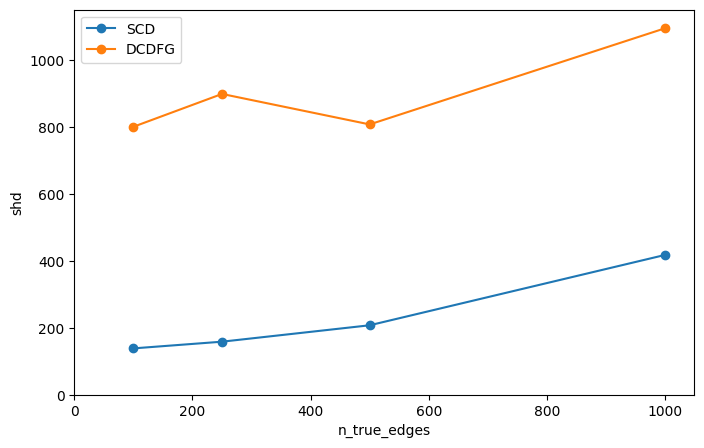

In [130]:
fig, ax = plt.subplots(figsize=(8, 5))
for method in ["SCD", "DCDFG"]:
    ax.plot(d50_sparsity_exp_df[d50_sparsity_exp_df["method"] == method]["n_true_edges"], d50_sparsity_exp_df[d50_sparsity_exp_df["method"] == method]["shd"], marker="o", label=method)
    method_df = d50_sparsity_exp_df[d50_sparsity_exp_df["method"] == method]
plt.legend()
plt.xlabel("n_true_edges")
plt.ylabel("shd")
plt.ylim((0, 1150))
plt.xlim((0, 1050))
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("figs/sparsity_shd.svg", bbox_inches="tight")